# Лабораторная работа №3

В рамках данной лабораторной работы вы проведете разведочный анализ данных.

**Требования:**
* Python >= 3.X
* Библиотеки `pandas`, `matplotlib`.

**Входные данные:**
* Файл sales.csv, в котором содержится информация о видеоиграх и их продажах. Каждая игра описана следующими признаками:
    1. `Rank` - рейтинг игры.    
    2. `Name` - название игры.    
    3. `Platform` - платформа (т.е. PC, PS4, и т.д.).    
    4. `Year` - год выпуска игры.    
    5. `Genre` - жанр игры.    
    6. `Publisher` - Publisher of the game.    
    7. `NA_Sales` - объем продаж в северной Америке (млн).    
    8. `EU_Sales` - объем продаж в Европе (млн).    
    9. `JP_Sales` - объем продаж в Японии (млн).    
    10. `Other_Sales` - объем продаж в остальном мире (млн).    
    11. `Global_Sales` - суммарные продажи в мире (млн).

Лабораторную работу необходимо выполнять в данном шаблоне. Результатом работы будет являться файл (с измененным именем), который необходимо выложить в Moodle.

**Важно!!!** Имя файлу задавайте по следующему шаблону **lab_2.1_Группа_ФамилияИО.ipynb**. Например: если Вас зовут Иванов Иван Иванович, и Вы обучаетесь в группе 6207_010302D, то имя файла будет выглядеть так **lab_2.1_6207_ИвановИИ.ipynb**.

#### Сделайте необходимые импорты:

In [1]:
!pip install matplotlib

import matplotlib.pyplot as plt
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


#### Загрузите данные в `pandas.DataFrame` и выведите первые и последние 15 строк.

In [20]:
df = pd.read_csv('sales.csv')
df = pd.DataFrame(df)

print(df.head(5), df.tail(5))

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37           Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597   

#### Проверьте форму (`shape`) данных. Сколько всего объектов в датасете?

In [21]:
print(df.shape)

(16598, 11)


Ответ: 16597

#### Каковы максимальный и средний объем продаж во всем мире (см. `pandas.DataFrame.describe`)?

In [13]:
# print(df.describe())
print(df['Global_Sales'].max())
print(df['Global_Sales'].mean())

82.74
0.5374406555006628


Ответ: max = 82.74; mean = 0.537441

#### Какие типы имеют каждый из признаков (см. `pandas.DataFrame.info`)?

In [18]:
for column_name in df.columns.tolist():
#     print(df.info())
    print(df[column_name].dtype)

int64
object
object
float64
object
object
float64
float64
float64
float64
float64


Ответ: int64, object, object, float64, object, object, float64, float64, float64, float64, float64

#### Оцените количество пропусков по каждому из признаков. Для числовых признаков заполните пропуски медианным значением, для прочих признаков удаляйте строки.

In [27]:
mean_values = {}
for column_name in df.columns.tolist():
    if df[column_name].dtype == df['Year'].dtype:
        mean_values[column_name] = df[column_name].mean()

mean_values['Year'] = int(mean_values['Year'])

for index, row in df.iterrows():
    for column_name in df.columns.tolist():
        if not row[column_name]:
            if column_name in mean_values.keys():
                row[column_name] = mean_values[column_name]
            elif df[column_name].dtype == df['Name'].dtype:
                df.drop(index, inplace=True)
                break

#### Постройте круговую диаграмму количества игр в разрезе жанров. Подпишите каждый сектор. Какой жанр самый популярный?

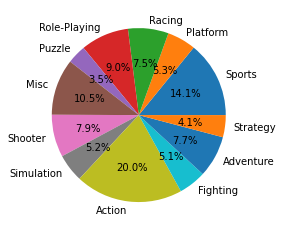

In [23]:
%matplotlib inline

genre_popularity = {}
for index, row in df.iterrows():
    genre_popularity[row['Genre']] = genre_popularity.get(row['Genre'], 0) + 1    

fig, ax = plt.subplots()
ax.pie(genre_popularity.values(), labels=genre_popularity.keys(), autopct='%1.1f%%')

plt.show()

Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте столбчатую диаграмму количества игр в разрезе игровых платформ. Столбцы должны идти в порядке убывания количества игр. Под какую платформу выпустили больше всего игр?

{'Wii': 1325, 'NES': 98, 'GB': 98, 'DS': 2163, 'X360': 1265, 'PS3': 1329, 'PS2': 2161, 'SNES': 239, 'GBA': 822, '3DS': 509, 'PS4': 336, 'N64': 319, 'PS': 1196, 'XB': 824, 'PC': 960, '2600': 133, 'PSP': 1213, 'XOne': 213, 'GC': 556, 'WiiU': 143, 'GEN': 27, 'DC': 52, 'PSV': 413, 'SAT': 173, 'SCD': 6, 'WS': 6, 'NG': 12, 'TG16': 2, '3DO': 3, 'GG': 1, 'PCFX': 1}


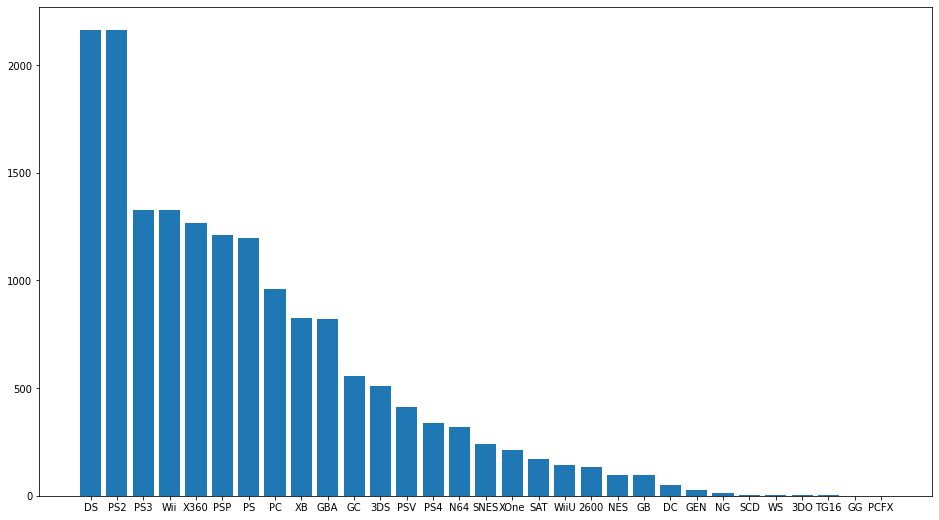

In [24]:
platform_popularity = {}
for index, row in df.iterrows():
    platform_popularity[row['Platform']] = platform_popularity.get(row['Platform'], 0) + 1  
    
print(platform_popularity)

platform_popularity = dict(sorted(platform_popularity.items(), key = lambda x: x[1], reverse = True))
    
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(platform_popularity.keys(), platform_popularity.values())

plt.show()

Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте столбчатую диаграмму количества игр по годам. Столбцы должны идти в хронологическом порядке. Какая пятилетка была самой удачной для игростроя?

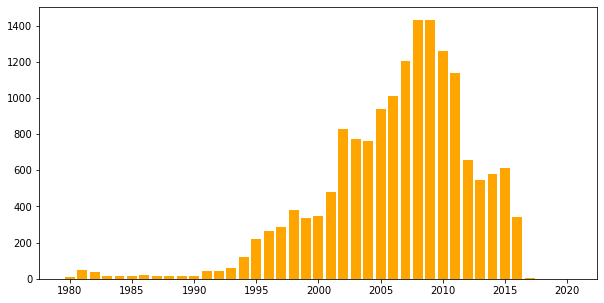

In [37]:
releases_per_year = {}
for index, row in df.iterrows():
    releases_per_year[row['Year']] = releases_per_year.get(row['Year'], 0) + 1  
    
releases_per_year =  dict(sorted(releases_per_year.items()))

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(releases_per_year.keys(), releases_per_year.values(), color='orange')

plt.show()

Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте столбчатую диаграмму общих доходов игровой индустрии по годам. Столбцы должны идти в хронологическом порядке. Какой год был самым прибыльным?

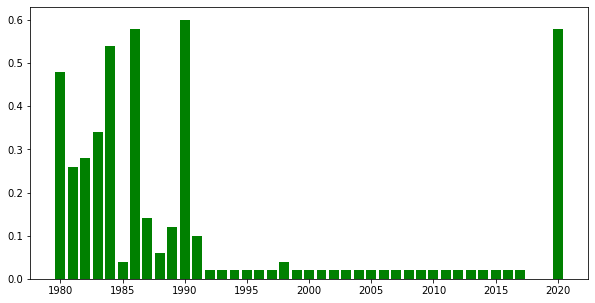

In [43]:
sales_per_year = {}
for index, row in df.iterrows():
    sales_per_year[row['Year']] = sales_per_year.get(row['Global_Sales'], 0) + row['Global_Sales'] 
    
sales_per_year =  dict(sorted(sales_per_year.items()))

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(sales_per_year.keys(), sales_per_year.values(), color='g')

plt.show()

Ответ: <span style="color:red">#впишите сюда</span>

#### Постройте диаграмму рассеивания между платформами и жанрами. Размер точки соответствует объему продаж. 

Пример:
![gr](gr.png)

In [44]:
sales_per_year = {}
for index, row in df.iterrows():
    sales_per_year[row['Platform']] = sales_per_year.get(row['Global_Sales'], 0) + row['Global_Sales'] 
    
sales_per_year =  dict(sorted(sales_per_year.items()))

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(sales_per_year.keys(), sales_per_year.values(), color='g')

plt.show()

#### Постройте линейный график объемов продаж шутеров в Японии по годам. Какой год был самым прибыльным?

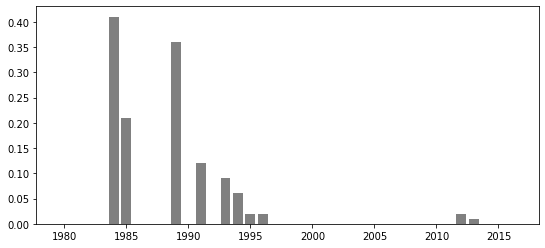

In [51]:
shooters_sales_Japan = {}
for index, row in df.iterrows():
    if row['Genre'] == 'Shooter':
        shooters_sales_Japan[row['Year']] = shooters_sales_Japan.get(row['JP_Sales'], 0) + row['JP_Sales'] 
    
shooters_sales_Japan =  dict(sorted(shooters_sales_Japan.items()))

fig, ax = plt.subplots(figsize=(9,4))
ax.bar(shooters_sales_Japan.keys(), shooters_sales_Japan.values(), color='gray')

plt.show()

Ответ: <span style="color:red">#впишите сюда</span>

### Дополнительные вопросы

#### Какие игры являются самыми старыми?

In [ ]:
# вставить код сюда

Ответ: <span style="color:red">#впишите сюда</span>

#### Сколько шутеров было выпущено в 2003 году?

In [ ]:
# вставить код сюда

Ответ: <span style="color:red">#впишите сюда</span>